# Optional Extra Credit Project Decision Tree(20 Points)
In this project you  use the training data generated below to build a classifier based on a decison trees algorithm.



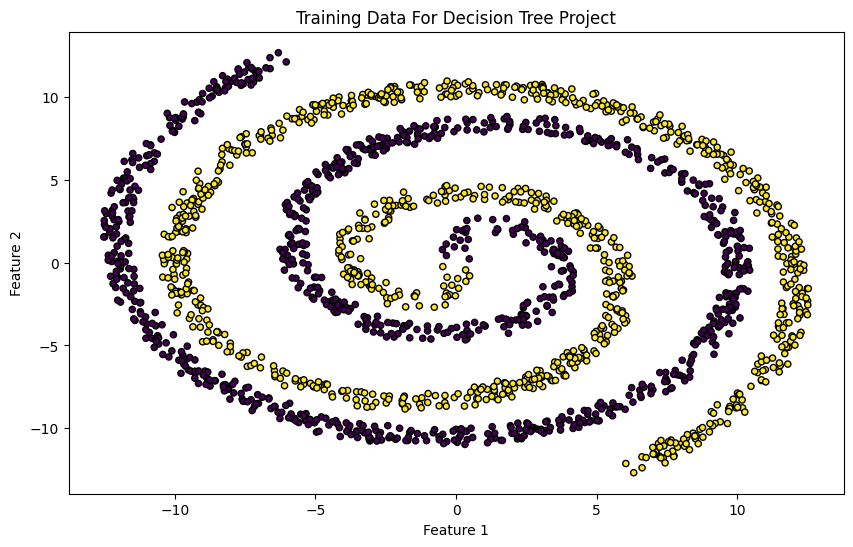

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))), np.hstack((np.zeros(n_points), np.ones(n_points)))

# Generate data
X, y = generate_spiral_data(1000)
dataset = np.column_stack((X, y))
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("Training Data For Decision Tree Project")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Instruction

Students have two options for this project.

**You can choose option 1 or option 2.**

**If both options are chosen your grade is 0.**

### **Option 1**(you earn **20 points** if the answer is correct. You earn n**o points** if the answer is incorrect. **There is no partial credit.**)


*   Use the training data provided above and write a decision tree code that uses  only the Numpy and matplotlib library.
*   Plot the decision boundary and the provided training data as shown in the figure below.

*   The code must run without an error and must produce the boundary similart to the figure shown below where all the training data points are classified in the correct region. **If any training data point is incorrectly classified, the answer is considered incorrect and you earn 0 points.**
*   The depth of the tree must be less than 25.


### **Option 2** (you earn **5 points** if the answer is correct. You earn **no points** if the answer is incorrect. **There is no partial credit.**)


*   Use the training data provided above and write a decision tree code that uses  the library of your choice.
*   Plot the decision boundary and the provided training data as shown in the figure below.

*   The code must run without an error and must produce the boundary similart to the figure shown below where all the training data points are classified in the correct region. **If any training data point is incorrectly classified, the answer is considered incorrect and you earn 0 points.**
*   The depth of the tree must be less than 25.


**After completing your project you should send an email to bazimi@umd.edu before the deadline. Any email received after the deadline is considered late. Late submission is not accepted and the project is not grade.**

**Any change after the deadline is conidered late submission. Late submission is not accepted and the project is not grade.**

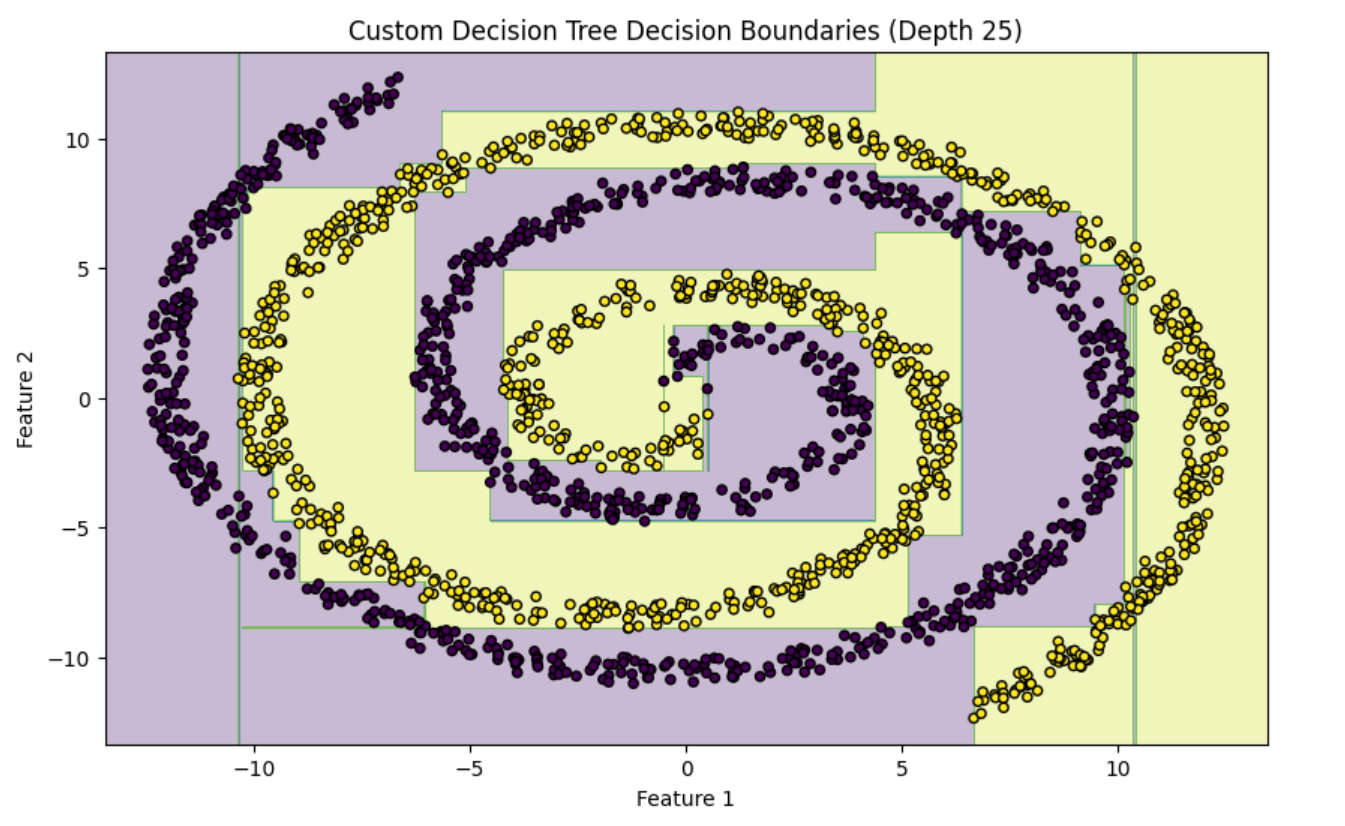

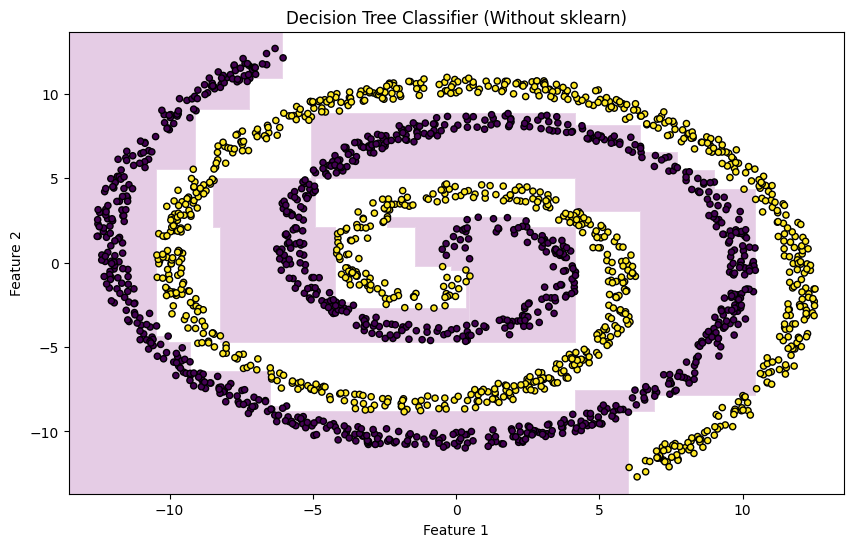

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(set(y)) == 1 or depth == self.max_depth:
            return {'class': max(set(y), key=list(y).count)}

        feature_index, threshold = self._find_best_split(X, y)

        if feature_index is None:
            return {'class': max(set(y), key=list(y).count)}

        indices_left = X[:, feature_index] <= threshold
        indices_right = ~indices_left

        left_subtree = self._build_tree(X[indices_left], y[indices_left], depth + 1)
        right_subtree = self._build_tree(X[indices_right], y[indices_right], depth + 1)

        return {'feature_index': feature_index, 'threshold': threshold,
                'left': left_subtree, 'right': right_subtree}

    def _find_best_split(self, X, y):
        num_features = X.shape[1]
        best_gini = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]

                gini = self._calculate_gini(y_left, y_right)

                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _calculate_gini(self, y_left, y_right):
        total_samples = len(y_left) + len(y_right)
        weight_left = len(y_left) / total_samples
        weight_right = len(y_right) / total_samples

        gini_left = 1.0 - sum((np.sum(y_left == c) / len(y_left)) ** 2 for c in set(y_left))
        gini_right = 1.0 - sum((np.sum(y_right == c) / len(y_right)) ** 2 for c in set(y_right))

        gini = weight_left * gini_left + weight_right * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']
        else:
            if x[node['feature_index']] <= node['threshold']:
                return self._predict_tree(x, node['left'])
            else:
                return self._predict_tree(x, node['right'])

# Train a decision tree classifier
tree = DecisionTree(max_depth=25)
tree.fit(X, y)

# Plot the decision boundary
plot_step = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the results with white and purple decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], colors=['purple', 'white'], alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("Decision Tree Classifier (Without sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()